In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [2]:
df1 = pd.read_parquet(r"C:\Users\sudwa\Desktop\mlops-datatalks\module1\yellow_tripdata_2022-01.parquet" )
df1.head()
#wget to read file

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [3]:
len(df1.columns)

19

In [4]:
old_len = len(df1)
old_len

2463931

In [5]:
df1.tpep_dropoff_datetime = pd.to_datetime(df1.tpep_dropoff_datetime)
df1.tpep_pickup_datetime = pd.to_datetime(df1.tpep_pickup_datetime)

In [6]:
df1['duration']=df1.tpep_dropoff_datetime - df1.tpep_pickup_datetime
df1.duration

0         00:17:49
1         00:08:24
2         00:08:58
3         00:10:02
4         00:37:32
            ...   
2463926   00:05:58
2463927   00:10:39
2463928   00:11:00
2463929   00:12:03
2463930   00:27:00
Name: duration, Length: 2463931, dtype: timedelta64[ns]

In [7]:
# note
#td1 = df1.duration.iloc[0]
#td1.total_seconds() /60

#from sec to min
#df1.duration = df1.duration.apply(lambda td1: td1.total_seconds() / 60)

In [8]:
df1['duration'] = df1.duration.dt.total_seconds()/60
#df1.duration = df1.duration.apply(lambda td1: td1.total_seconds() / 60)

In [9]:
#df1.duration
df1.duration.describe()
#46.45

count    2.463931e+06
mean     1.421220e+01
std      4.644531e+01
min     -3.442400e+03
25%      6.316667e+00
50%      1.018333e+01
75%      1.616667e+01
max      8.513183e+03
Name: duration, dtype: float64

<AxesSubplot:xlabel='duration'>

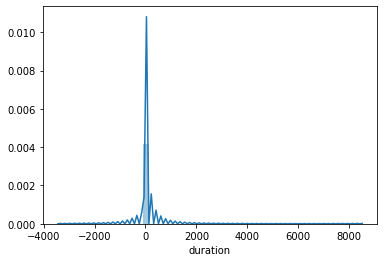

In [10]:
sns.distplot(df1.duration)

In [11]:
df1.duration.describe(percentiles=[0.95, 0.98,0.99])

count    2.463931e+06
mean     1.421220e+01
std      4.644531e+01
min     -3.442400e+03
50%      1.018333e+01
95%      3.193333e+01
98%      4.215000e+01
99%      5.085000e+01
max      8.513183e+03
Name: duration, dtype: float64

In [12]:
#((df1.duration >=1) & (df1.duration <=60)).mean()
#0.9827547930522406
df1 = df1[(df1.duration >=1) & (df1.duration <=60)]

In [13]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

In [14]:
#df1[categorical].dtypes
#df1.dtypes
df1[categorical] = df1[categorical].astype(str)

In [15]:
train_dicts = df1[categorical+ numerical].to_dict(orient = 'records')

In [16]:
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

In [17]:
X_train
#dv.feature_names_

<2421440x516 sparse matrix of type '<class 'numpy.float64'>'
	with 7264320 stored elements in Compressed Sparse Row format>

In [18]:
target='duration'
y_train = df1[target].values

In [19]:
y_train

array([17.81666667,  8.4       ,  8.96666667, ..., 11.        ,
       12.05      , 27.        ])

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_pred = lr.predict(X_train)

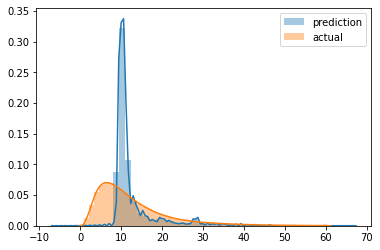

In [22]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')

plt.legend()

In [23]:
mean_squared_error(y_train, y_pred, squared=False)

6.986335062101244

In [24]:
def read_dataframe(filename):
    if filename.endswith('.csv'):
        df = pd.read_csv(filename)

        df.lpep_dropoff_datetime = pd.to_datetime(df.lpep_dropoff_datetime)
        df.lpep_pickup_datetime = pd.to_datetime(df.lpep_pickup_datetime)
    elif filename.endswith('.parquet'):
        df = pd.read_parquet(filename)

    df['duration'] = df.tpep_dropoff_datetime - df.tpep_pickup_datetime
    df.duration = df.duration.apply(lambda td: td.total_seconds() / 60)

    df = df[(df.duration >= 1) & (df.duration <= 60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)
    
    return df

In [25]:
df_train = read_dataframe(r"C:\Users\sudwa\Desktop\mlops-datatalks\module1\yellow_tripdata_2022-01.parquet")
df_val = read_dataframe(r"C:\Users\sudwa\Desktop\mlops-datatalks\module1\yellow_tripdata_2022-02.parquet" )

#df_train = pd.read_parquet(r"C:\Users\sudwa\Desktop\mlops-datatalks\module1\yellow_tripdata_2022-01.parquet" )

#df_val = pd.read_parquet(r"C:\Users\sudwa\Desktop\mlops-datatalks\module1\yellow_tripdata_2022-02.parquet" )



In [26]:
len(df_train), len(df_val)

(2421440, 2918187)

In [27]:
df_train['PU_DO'] = df_train['PULocationID'] + '_' + df_train['DOLocationID']
df_val['PU_DO'] = df_val['PULocationID'] + '_' + df_val['DOLocationID']

In [28]:
categorical = ['PU_DO'] #'PULocationID', 'DOLocationID']
numerical = ['trip_distance']

dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [29]:
target = 'duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [30]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

5.414840287543104

In [32]:
#o.oo1 0.01 0.1
'''lass = Lasso()
lass.fit(X_train, y_train)

y_pred = lass.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)'''

'lass = Lasso()\nlass.fit(X_train, y_train)\n\ny_pred = lass.predict(X_val)\n\nmean_squared_error(y_val, y_pred, squared=False)'

In [ ]:
'''with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)'''

In [35]:
# Open a file and use dump()
import pickle
with open('file.pkl', 'wb') as file:
      
    # A new file will be created
    pickle.dump(lr, file)